<a href="https://colab.research.google.com/github/MohammedTamim/Image-Recognition-System-AI/blob/main/Image_Recognization_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 1

In [ ]:
pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdtamimrawoot","key":"857e46462395a258d97a71b6c270a194"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) - y_train shape: (60000,)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"train reshaped: {x_train.shape} ")

train reshaped: (60000, 28, 28, 1) 


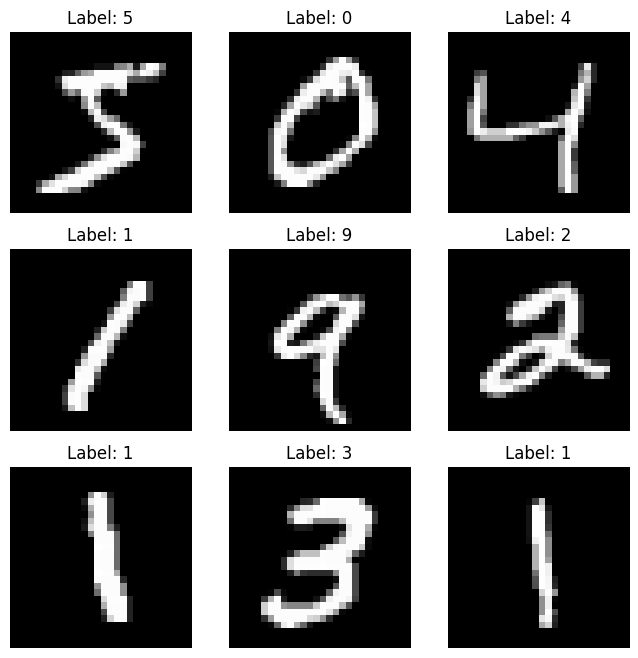

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis("off")
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


 DAY 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8935 - loss: 0.3425 - val_accuracy: 0.9815 - val_loss: 0.0620
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9836 - loss: 0.0527 - val_accuracy: 0.9873 - val_loss: 0.0442
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9906 - loss: 0.0307 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9927 - loss: 0.0208 - val_accuracy: 0.9895 - val_loss: 0.0400
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9939 - loss: 0.0178 - val_accuracy: 0.9887 - val_loss: 0.0433


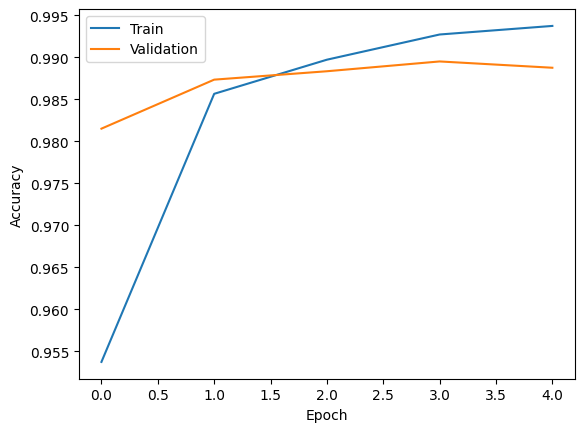

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0387
Test accuracy: 0.9907
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

DAY 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 75ms/step - accuracy: 0.3391 - loss: 1.7914 - val_accuracy: 0.4025 - val_loss: 1.6824
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 73ms/step - accuracy: 0.5278 - loss: 1.3317 - val_accuracy: 0.5670 - val_loss: 1.2323
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5815 - loss: 1.1915 - val_accuracy: 0.6140 - val_loss: 1.1628
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6157 - loss: 1.0958 - val_accuracy: 0.6435 - val_loss: 1.0244
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6368 - loss: 1.0500 - val_accuracy: 0.6530 - val_loss: 0.9955
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.6528 - loss: 1.0092 - val_accuracy: 0.6749 - val_loss: 0.9402
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.6635 - loss: 0.9737 - val_accuracy: 0.6824 - val_loss: 0.9565
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.6765 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      1000
           1       0.67      0.93      0.78      1000
           2       0.64      0.48      0.55      1000
           3       0.63      0.33      0.43      1000
           4       0.69      0.58      0.63      1000
           5       0.74      0.51      0.60      1000
           6       0.60      0.85      0.70      1000
           7       0.72      0.75      0.73      1000
           8       0.77      0.78      0.77      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



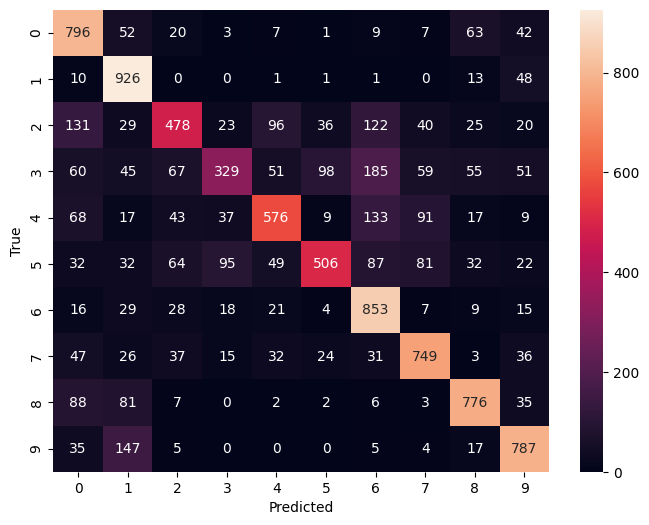

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

DAY 4

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 87% 190M/218M [00:00<00:00, 428MB/s] 
100% 218M/218M [00:00<00:00, 399MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.7881 - loss: 0.5577 - val_accuracy: 0.7985 - val_loss: 0.5227
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.7991 - loss: 0.4976 - val_accuracy: 0.7985 - val_loss: 0.5122
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.8015 - loss: 0.4851 - val_accuracy: 0.7985 - val_loss: 0.5129
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.7965 - loss: 0.4755 - val_accuracy: 0.7980 - val_loss: 0.5205
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.8011 - loss: 0.4541 - val_accuracy: 0.7985 - val_loss: 0.5350


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
              )
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1749s 7s/step - accuracy: 0.8008 - loss: 0.4950 - val_accuracy: 0.7985 - val_loss: 0.5391
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1732s 7s/step - accuracy: 0.7998 - loss: 0.4546 - val_accuracy: 0.7985 - val_loss: 0.5343
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1793s 7s/step - accuracy: 0.8016 - loss: 0.4331 - val_accuracy: 0.7985 - val_loss: 0.5372


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step


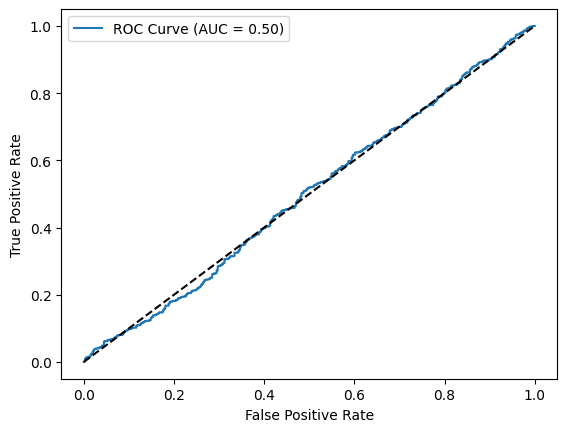

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

DAY 5

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpeg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving Screenshot 2023-12-06 000629.png to Screenshot 2023-12-06 000629.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted class: Dog


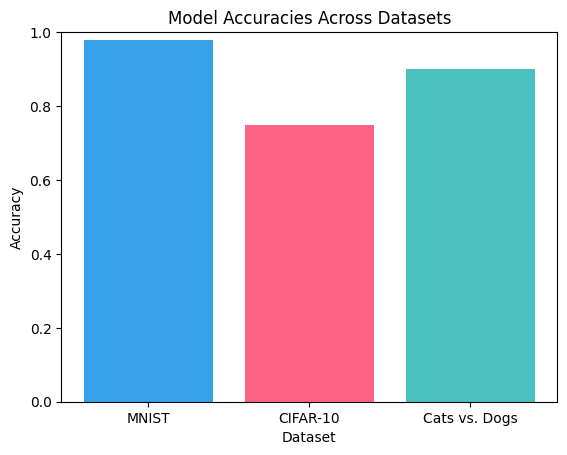

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()